In [ ]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#Split the full training set into a validation set and a (smaller) training set. 
#We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

X_train = X_train/ 255.
X_test = X_test / 255.

#convert the vector of class indices into a matrix containing a one-hot vector for each instance
num_classes = 10
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Sample dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000,784))

# Create a logistic regression model with OVA approach
model = LogisticRegression(solver='lbfgs', multi_class='multinomial' , max_iter=500)
model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [68]:
# Calculate the final loss using the log-loss function
y_pred = model.predict_proba(X_train)


optimal loss: 0.34120384885315375


In [69]:
import numpy as np

def softmax(x):
    # Compute the softmax of vector x.
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    # Compute the cross entropy loss between predicted and true labels.
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred)) / m
    return loss

In [70]:
def stochasticGradientDescent(X_train, y_train,learning_rate=0.01, num_epochs=50, batch_size=32):
    # Implement stochastic gradient descent for softmax regression.

    m = X_train.shape[0]
    n= X_train.shape[1]
    num_batches = m // batch_size

    
    # Initialize weights randomly
    W = np.random.randn(n, len(np.unique(y_train)))
    b = np.zeros(len(np.unique(y_train)))
    
    # One-hot encode the labels
    y_onehot = np.zeros((m, len(np.unique(y_train))))
    y_onehot[np.arange(m), y_train] = 1

    
    # Training loop
    train_losses = []
    train_accuracies = []
    for epoch in range(num_epochs):
        # Shuffle the data
        permuted_indices = np.random.permutation(m)
        X_shuffled = X_train[permuted_indices]
        y_shuffled = y_train[permuted_indices]
        y_onehot_shuffled = y_onehot[permuted_indices]
        
        for i in range(num_batches):
            # Get the current batch
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            X_batch = X_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]
            y_onehot_batch = y_onehot_shuffled[start_idx:end_idx]
            
            # Forward pass
            z = np.dot(X_batch, W) + b
            y_pred = softmax(z)
            loss = cross_entropy_loss(y_pred, y_onehot_batch)
            
            # Backward pass
            dW = np.dot(X_batch.T, y_pred - y_onehot_batch) / batch_size
            db = np.mean(y_pred - y_onehot_batch, axis=0)
            
            # Update weights and biases
            W -= learning_rate * dW
            b -= learning_rate * db
            
        # Compute the loss and accuracy for the whole dataset
        z = np.dot(X_train, W) + b
        y_pred = softmax(z)
        loss = cross_entropy_loss(y_pred, y_onehot)
        train_losses.append(loss)
        accuracy = np.mean(np.argmax(y_pred, axis=1) == y_train)
        train_accuracies.append(accuracy)

        # Print the loss and accuracy for each epoch
        print("Epoch {}: loss = {:.4f}, accuracy = {:.4f}".format(epoch, loss, accuracy))
    return W, b, train_losses, train_accuracies

W, b, train_losses, train_accuracies = stochasticGradientDescent(X_train,y_train,learning_rate=0.01)

Epoch 0: loss = 2.3658, accuracy = 0.5587
Epoch 1: loss = 1.8044, accuracy = 0.6339
Epoch 2: loss = 1.5548, accuracy = 0.6748
Epoch 3: loss = 1.4227, accuracy = 0.6931
Epoch 4: loss = 1.3154, accuracy = 0.7119
Epoch 5: loss = 1.2418, accuracy = 0.7240
Epoch 6: loss = 1.1841, accuracy = 0.7339
Epoch 7: loss = 1.1357, accuracy = 0.7398
Epoch 8: loss = 1.0956, accuracy = 0.7460
Epoch 9: loss = 1.0579, accuracy = 0.7524
Epoch 10: loss = 1.0298, accuracy = 0.7582
Epoch 11: loss = 1.0046, accuracy = 0.7609
Epoch 12: loss = 0.9809, accuracy = 0.7649
Epoch 13: loss = 0.9545, accuracy = 0.7670
Epoch 14: loss = 0.9381, accuracy = 0.7695
Epoch 15: loss = 0.9185, accuracy = 0.7741
Epoch 16: loss = 0.9025, accuracy = 0.7764
Epoch 17: loss = 0.8837, accuracy = 0.7791
Epoch 18: loss = 0.8694, accuracy = 0.7807
Epoch 19: loss = 0.8590, accuracy = 0.7827
Epoch 20: loss = 0.8442, accuracy = 0.7856
Epoch 21: loss = 0.8325, accuracy = 0.7871
Epoch 22: loss = 0.8197, accuracy = 0.7894
Epoch 23: loss = 0.80

In [71]:
from numpy.random.mtrand import beta
#SGD with BB step size (SGD-BB)
def stochasticGradientDescent_With_BB(X_train, y_train,learning_rate=0.01, num_epochs=50, batch_size=32,beta=0.2):
    # Implement stochastic gradient descent for softmax regression.

    m = X_train.shape[0]
    n= X_train.shape[1]
    num_batches = m // batch_size

    
    # Initialize weights randomly
    W = np.random.randn(n, len(np.unique(y_train)))
    b = np.zeros(len(np.unique(y_train)))


    
    # One-hot encode the labels
    y_onehot = np.zeros((m, len(np.unique(y_train))))
    y_onehot[np.arange(m), y_train] = 1

    z = np.dot(X_train, W) + b
    y_pred = softmax(z)
    full_grad_W = np.dot(X_train.T, y_pred - y_onehot) / m
    full_grad_b = np.mean(y_pred - y_onehot, axis=0)
    

    #Copying Varibles 
    W2 = W.copy()
    b2 = b.copy()
    

    # Training loop
    train_losses = []
    train_accuracies = []
    for epoch in range(num_epochs):
        # Shuffle the data
        permuted_indices = np.random.permutation(m)
        X_shuffled = X_train[permuted_indices]
        y_shuffled = y_train[permuted_indices]
        y_onehot_shuffled = y_onehot[permuted_indices]
        if(epoch > 0):
          val = np.dot(full_grad_W.T,full_grad_W2) / np.linalg.norm(full_grad_W,ord=2)**2
          denom = abs(1-val)
          learning_rate = learning_rate/denom
          learning_rate = np.mean(learning_rate)

        W2 = W.copy()
        b2 = b.copy()
        tot_grad = np.vstack([W2,b2])
        full_grad_W = beta*tot_grad + (1-beta)*tot_grad

        full_grad_W2 = full_grad_W.copy()
        full_grad_b2 = full_grad_b.copy()
        for i in range(num_batches):
            # Get the current batch
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            X_batch = X_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]
            y_onehot_batch = y_onehot_shuffled[start_idx:end_idx]
            
            # Forward pass
            z = np.dot(X_batch, W) + b
            y_pred = softmax(z)
            loss = cross_entropy_loss(y_pred, y_onehot_batch)
            
            # Backward pass
            dW = np.dot(X_batch.T, y_pred - y_onehot_batch) / batch_size
            db = np.mean(y_pred - y_onehot_batch, axis=0)
            

            # Update weights and biases
            W -= learning_rate * dW
            b -= learning_rate * db

            #Updating Full gradient
            tot_grad = np.vstack([dW,b])
            full_grad_W = beta*tot_grad + (1-beta)*tot_grad
            
        # Compute the loss and accuracy for the whole dataset
        z = np.dot(X_train, W) + b
        y_pred = softmax(z)
        loss = cross_entropy_loss(y_pred, y_onehot)
        train_losses.append(loss)
        accuracy = np.mean(np.argmax(y_pred, axis=1) == y_train)
        train_accuracies.append(accuracy)

        # Print the loss and accuracy for each epoch
        print("Epoch {}: loss = {:.4f}, accuracy = {:.4f} , learning rate = {:.4f} ".format(epoch, loss, accuracy,learning_rate))
    return W, b, train_losses, train_accuracies
losses=[]
W_step, b_step, train_losses_step, train_accuracies_step = stochasticGradientDescent_With_BB(X_train,y_train,learning_rate=0.01)

Epoch 0: loss = 2.2940, accuracy = 0.5648 , learning rate = 0.0100 
Epoch 1: loss = 1.7671, accuracy = 0.6383 , learning rate = 0.0104 
Epoch 2: loss = 1.5297, accuracy = 0.6753 , learning rate = 0.0106 
Epoch 3: loss = 1.3802, accuracy = 0.6996 , learning rate = 0.0108 
Epoch 4: loss = 1.2857, accuracy = 0.7171 , learning rate = 0.0109 
Epoch 5: loss = 1.2089, accuracy = 0.7277 , learning rate = 0.0111 
Epoch 6: loss = 1.1459, accuracy = 0.7369 , learning rate = 0.0112 
Epoch 7: loss = 1.1002, accuracy = 0.7431 , learning rate = 0.0114 
Epoch 8: loss = 1.0568, accuracy = 0.7487 , learning rate = 0.0115 
Epoch 9: loss = 1.0198, accuracy = 0.7564 , learning rate = 0.0117 
Epoch 10: loss = 0.9861, accuracy = 0.7619 , learning rate = 0.0119 
Epoch 11: loss = 0.9603, accuracy = 0.7647 , learning rate = 0.0121 
Epoch 12: loss = 0.9315, accuracy = 0.7706 , learning rate = 0.0123 
Epoch 13: loss = 0.9114, accuracy = 0.7736 , learning rate = 0.0124 
Epoch 14: loss = 0.8999, accuracy = 0.7731 ,

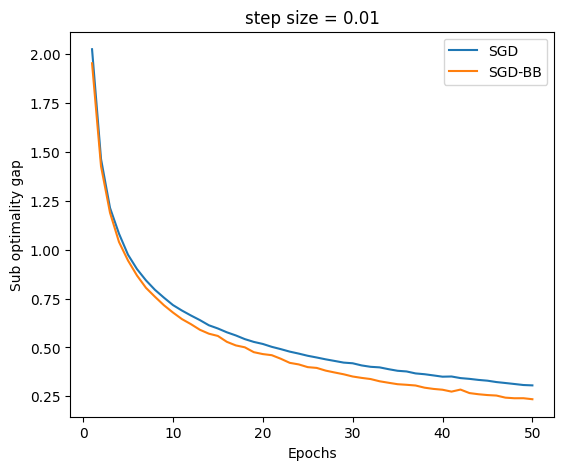

In [72]:
fig, ax = plt.subplots(1, 1,figsize=(6.25, 5))

ax.set_title("step size = 0.01")
sgd_subopt_gap=[abs(opt_loss-i) for i in train_losses]
sgd_bb_subopt_gap=[abs(opt_loss-i) for i in train_losses_step]
x_points=np.array([i for i in range(1,51)])
ax.plot(x_points,sgd_subopt_gap,label="SGD")
ax.plot(x_points,sgd_bb_subopt_gap,label="SGD-BB")
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("Sub optimality gap")


plt.show()

In [73]:
def SVRG(X_train, y_train,learning_rate=0.001, num_epochs=50, batch_size=32,update_frequency=22):
    # Implement stochastic variance reduced gradient for softmax regression.

    m = X_train.shape[0]
    n= X_train.shape[1]
    num_batches = m // batch_size
    
    # Initialize weights randomly
    W = np.zeros([n, len(np.unique(y_train))])
    b = np.zeros(len(np.unique(y_train)))
    
    # One-hot encode the labels
    y_onehot = np.zeros((m, len(np.unique(y_train))))
    y_onehot[np.arange(m), y_train] = 1
    

    # Training loop
    train_losses = []
    train_accuracies = []
    for epoch in range(num_epochs):
      if epoch % update_frequency == 0:
            W_full_grad = np.zeros_like(W)
            b_full_grad = np.zeros_like(b)

            z = np.dot(X_train, W) + b
            y_pred = softmax(z)
            full_grad_W = np.dot(X_train.T, y_pred - y_onehot) / m
            full_grad_b = np.mean(y_pred - y_onehot, axis=0)

            W_temp = np.copy(W)
            b_temp = np.copy(b)
      permuted_indices = np.random.permutation(m)
      X_shuffled = X_train[permuted_indices]
      y_shuffled = y_onehot[permuted_indices]

      for i in range(num_batches):
          start_idx = i * batch_size
          end_idx = start_idx + batch_size
          X_batch = X_shuffled[start_idx:end_idx]
          y_batch = y_shuffled[start_idx:end_idx]

          z = np.dot(X_batch, W_temp) + b_temp
          y_pred_temp = softmax(z)

          grad_W_temp = np.dot(X_batch.T, y_pred_temp - y_batch) / batch_size
          grad_b_temp = np.mean(y_pred_temp - y_batch, axis=0)

          z = np.dot(X_batch, W) + b
          y_pred = softmax(z)

          grad_W = np.dot(X_batch.T, y_pred - y_batch) / batch_size
          grad_b = np.mean(y_pred - y_batch, axis=0)

          W -= learning_rate * (grad_W - grad_W_temp + full_grad_W)
          b -= learning_rate * (grad_b - grad_b_temp + full_grad_b)

      z = np.dot(X_train, W) + b
      y_pred = softmax(z)
      loss = cross_entropy_loss(y_pred, y_onehot)
      train_losses.append(loss)
      accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_onehot, axis=1))
      train_accuracies.append(accuracy)

      # Print the loss and accuracy for each epoch
      print("Epoch {}: loss = {:.4f}, accuracy = {:.4f}".format(epoch, loss, accuracy))
    return W, b, train_losses, train_accuracies

W, b, train_losses, train_accuracies = SVRG(X_train,y_train)

Epoch 0: loss = 1.0859, accuracy = 0.6827
Epoch 1: loss = 0.8940, accuracy = 0.7219
Epoch 2: loss = 0.8085, accuracy = 0.7477
Epoch 3: loss = 0.7565, accuracy = 0.7627
Epoch 4: loss = 0.7203, accuracy = 0.7758
Epoch 5: loss = 0.6930, accuracy = 0.7837
Epoch 6: loss = 0.6713, accuracy = 0.7902
Epoch 7: loss = 0.6535, accuracy = 0.7935
Epoch 8: loss = 0.6385, accuracy = 0.7989
Epoch 9: loss = 0.6258, accuracy = 0.8018
Epoch 10: loss = 0.6148, accuracy = 0.8044
Epoch 11: loss = 0.6050, accuracy = 0.8074
Epoch 12: loss = 0.5962, accuracy = 0.8100
Epoch 13: loss = 0.5887, accuracy = 0.8110
Epoch 14: loss = 0.5817, accuracy = 0.8137
Epoch 15: loss = 0.5752, accuracy = 0.8154
Epoch 16: loss = 0.5691, accuracy = 0.8165
Epoch 17: loss = 0.5637, accuracy = 0.8186
Epoch 18: loss = 0.5586, accuracy = 0.8194
Epoch 19: loss = 0.5539, accuracy = 0.8208
Epoch 20: loss = 0.5497, accuracy = 0.8218
Epoch 21: loss = 0.5457, accuracy = 0.8230
Epoch 22: loss = 0.5415, accuracy = 0.8243
Epoch 23: loss = 0.53

In [74]:
def SVRG_With_BB(X_train, y_train,learning_rate=0.001, num_epochs=50, batch_size=32,update_frequency=22):
    # Implement stochastic variance reduced gradient for softmax regression.

    m = X_train.shape[0]
    n= X_train.shape[1]
    num_batches = m // batch_size
    
    # Initialize weights randomly
    W = np.zeros([n, len(np.unique(y_train))])
    b = np.zeros(len(np.unique(y_train)))
    
    # One-hot encode the labels
    y_onehot = np.zeros((m, len(np.unique(y_train))))
    y_onehot[np.arange(m), y_train] = 1
    

    # Training loop
    train_losses = []
    train_accuracies = []
    for epoch in range(num_epochs):
      z = np.dot(X_train, W) + b
      y_pred = softmax(z)
      full_grad_W = np.dot(X_train.T, y_pred - y_onehot) / m
      full_grad_b = np.mean(y_pred - y_onehot, axis=0)
      if(epoch > 0):
            val = np.dot(full_grad_W.T,full_grad_W2) / np.linalg.norm(full_grad_W,ord=2)**2
            denom = abs(1-val)
            learning_rate = learning_rate/denom
            learning_rate = np.mean(learning_rate)
      full_grad_W2 = np.copy(full_grad_W)
      W_temp = np.copy(W)
      b_temp = np.copy(b)
      permuted_indices = np.random.permutation(m)
      X_shuffled = X_train[permuted_indices]
      y_shuffled = y_onehot[permuted_indices]

      for i in range(num_batches):
          start_idx = i * batch_size
          end_idx = start_idx + batch_size
          X_batch = X_shuffled[start_idx:end_idx]
          y_batch = y_shuffled[start_idx:end_idx]

          z = np.dot(X_batch, W_temp) + b_temp
          y_pred_temp = softmax(z)

          grad_W_temp = np.dot(X_batch.T, y_pred_temp - y_batch) / batch_size
          grad_b_temp = np.mean(y_pred_temp - y_batch, axis=0)

          z = np.dot(X_batch, W) + b
          y_pred = softmax(z)

          grad_W = np.dot(X_batch.T, y_pred - y_batch) / batch_size
          grad_b = np.mean(y_pred - y_batch, axis=0)

          W -= learning_rate * (grad_W - grad_W_temp + full_grad_W)
          b -= learning_rate * (grad_b - grad_b_temp + full_grad_b)

      z = np.dot(X_train, W) + b
      y_pred = softmax(z)
      loss = cross_entropy_loss(y_pred, y_onehot)
      train_losses.append(loss)
      accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_onehot, axis=1))
      train_accuracies.append(accuracy)

      # Print the loss and accuracy for each epoch
      print("Epoch {}: loss = {:.4f}, accuracy = {:.4f} , learning rate = {:.4f} ".format(epoch, loss, accuracy,learning_rate))
    return W, b, train_losses, train_accuracies

W_step, b_step, train_losses_step, train_accuracies_step = SVRG_With_BB(X_train,y_train)

Epoch 0: loss = 1.0848, accuracy = 0.6820 , learning rate = 0.0010 
Epoch 1: loss = 0.7932, accuracy = 0.7539 , learning rate = 0.0023 
Epoch 2: loss = 0.6581, accuracy = 0.7936 , learning rate = 0.0045 
Epoch 3: loss = 0.5890, accuracy = 0.8111 , learning rate = 0.0062 
Epoch 4: loss = 0.5530, accuracy = 0.8208 , learning rate = 0.0063 
Epoch 5: loss = 0.5220, accuracy = 0.8287 , learning rate = 0.0092 
Epoch 6: loss = 0.5022, accuracy = 0.8344 , learning rate = 0.0092 
Epoch 7: loss = 0.4828, accuracy = 0.8396 , learning rate = 0.0137 
Epoch 8: loss = 0.4693, accuracy = 0.8434 , learning rate = 0.0139 
Epoch 9: loss = 0.4587, accuracy = 0.8468 , learning rate = 0.0150 
Epoch 10: loss = 0.4504, accuracy = 0.8487 , learning rate = 0.0153 
Epoch 11: loss = 0.4428, accuracy = 0.8507 , learning rate = 0.0177 
Epoch 12: loss = 0.4363, accuracy = 0.8524 , learning rate = 0.0192 
Epoch 13: loss = 0.4304, accuracy = 0.8541 , learning rate = 0.0214 
Epoch 14: loss = 0.4255, accuracy = 0.8555 ,

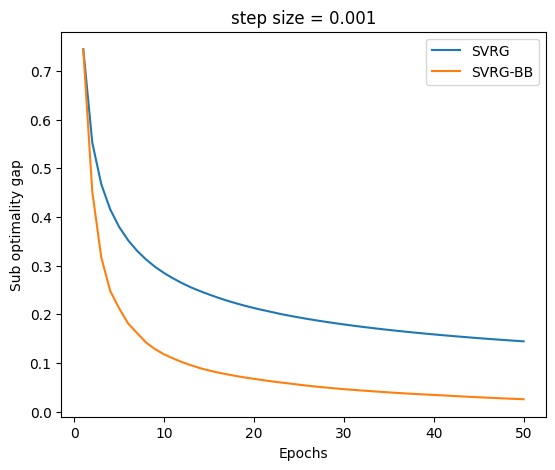

In [75]:
fig, ax = plt.subplots(1, 1,figsize=(6.25, 5))

ax.set_title("step size = 0.001")
sgd_subopt_gap=[abs(opt_loss-i) for i in train_losses]
sgd_bb_subopt_gap=[abs(opt_loss-i) for i in train_losses_step]
x_points=np.array([i for i in range(1,51)])
ax.plot(x_points,sgd_subopt_gap,label="SVRG")
ax.plot(x_points,sgd_bb_subopt_gap,label="SVRG-BB")
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("Sub optimality gap")


plt.show()